### Import Libraries

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
df = pd.read_csv('../../data/traditional_preprocessed_data.csv')
df.head()

,Comment,Sentiment,Language
0,맛있 분위기 좋 어요 야외 에서 식사 가능 어서 날씨 좋 으면 더 좋 어요,1,ko
1,어느 수산 시장 에서 나 나오 면 먹 수 있 민어 맛집 서비스 업종 역사 상 최악 ...,0,ko
2,wow wow funki littl fleet sassi,1,en
3,invent origin purpos british thing ever saw today,1,en
4,양 푸짐 소스 모자라 면 리필 가능 어서 좋 어요 명 먹 기 좀 많 양 나 먹 보 ...,1,ko


In [9]:
print(df["Comment"].isnull().sum())
df = df.dropna(subset=["Comment"])
df["Sentiment"].value_counts()

46


Sentiment
1    99987
0    99967
Name: count, dtype: int64

### Train test split

In [10]:
X = df["Comment"]
y = df["Sentiment"]

In [11]:
X.shape, y.shape

((199954,), (199954,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159963,), (39991,), (159963,), (39991,))

### TF-iDF 

In [14]:
tf_idf = TfidfVectorizer()

In [15]:
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

## Model Training

### Logistic Regression



In [16]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Test and Test Evaluation

In [17]:
# Test evaluation
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     19998
           1       0.88      0.84      0.86     19993

    accuracy                           0.86     39991
   macro avg       0.86      0.86      0.86     39991
weighted avg       0.86      0.86      0.86     39991



In [18]:
# Train evaluation
y_pred = log_reg.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     79969
           1       0.91      0.87      0.89     79994

    accuracy                           0.89    159963
   macro avg       0.89      0.89      0.89    159963
weighted avg       0.89      0.89      0.89    159963



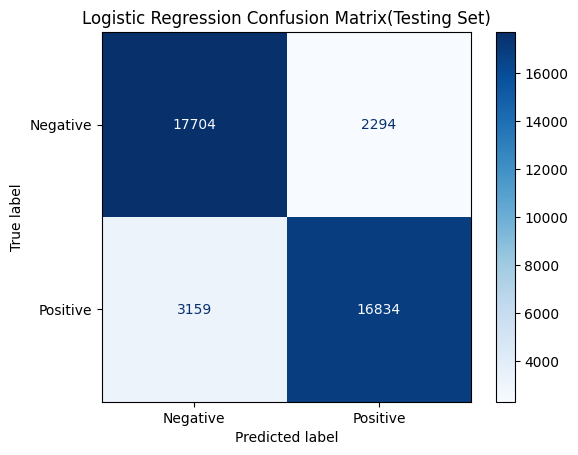

In [19]:
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test, y_test, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Logistic Regression Confusion Matrix(Testing Set)")
plt.show()

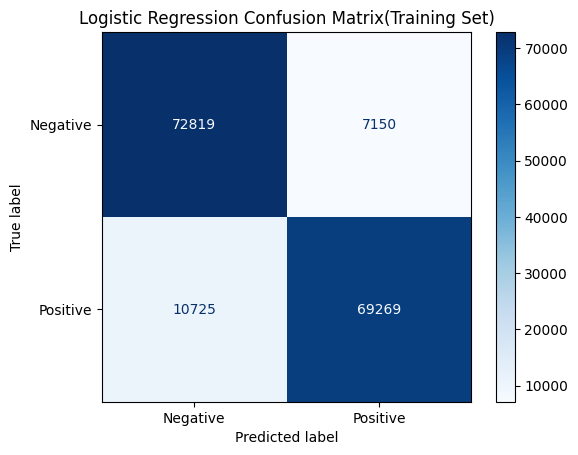

In [20]:
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_train, y_train, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Logistic Regression Confusion Matrix(Training Set)")
plt.show()

### SVM

In [21]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [22]:
# Test evaluation
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     19998
           1       0.87      0.85      0.86     19993

    accuracy                           0.86     39991
   macro avg       0.86      0.86      0.86     39991
weighted avg       0.86      0.86      0.86     39991



In [23]:
# Train evaluation
y_pred = svm.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     79969
           1       0.94      0.92      0.93     79994

    accuracy                           0.93    159963
   macro avg       0.93      0.93      0.93    159963
weighted avg       0.93      0.93      0.93    159963



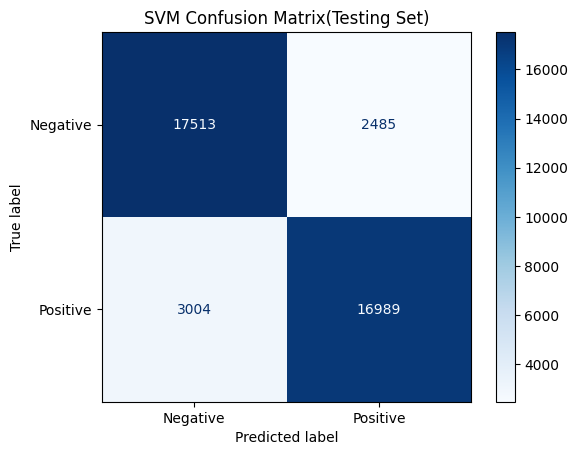

In [24]:
ConfusionMatrixDisplay.from_estimator(
    svm, X_test, y_test, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("SVM Confusion Matrix(Testing Set)")
plt.show()

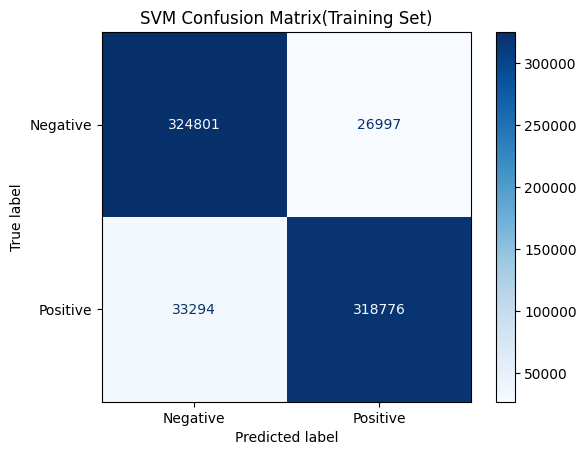

In [78]:
ConfusionMatrixDisplay.from_estimator(
    svm, X_train, y_train, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("SVM Confusion Matrix(Training Set)")
plt.show()

### Naive Bayes

In [25]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Test evaluation
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     19998
           1       0.87      0.85      0.86     19993

    accuracy                           0.86     39991
   macro avg       0.86      0.86      0.86     39991
weighted avg       0.86      0.86      0.86     39991



In [ ]:
# Train evaluation
y_pred = nb.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     79969
           1       0.94      0.92      0.93     79994

    accuracy                           0.93    159963
   macro avg       0.93      0.93      0.93    159963
weighted avg       0.93      0.93      0.93    159963



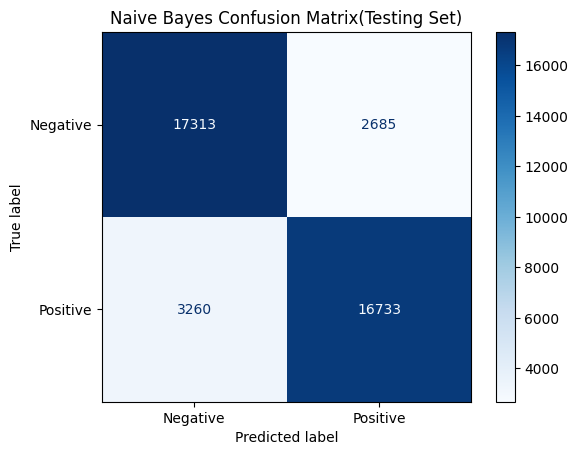

In [28]:
ConfusionMatrixDisplay.from_estimator(
    nb, X_test, y_test, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Naive Bayes Confusion Matrix(Testing Set)")
plt.show()

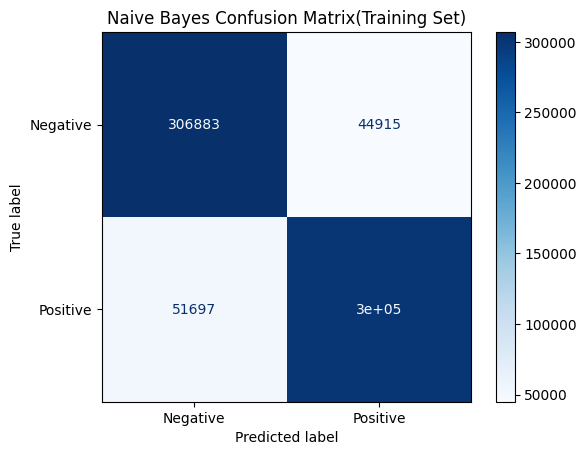

In [84]:
ConfusionMatrixDisplay.from_estimator(
    nb, X_train, y_train, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Naive Bayes Confusion Matrix(Training Set)")
plt.show()